In [2]:
import keras
import os, shutil
# load cat and dog images

# Directories for training, validation, and test sets
train_dir = './data/weather_train'
valid_dir ='./data/weather_validation'
test_dir = './data/weather_test'

### The below is not necessary
# Directory with the training cat and dog pictures
train_snowy_dir = os.path.join(train_dir, 'snowy')
train_rainy_dir = os.path.join(train_dir, 'rainy')

# Directory with the validation cat and dog pictures
valid_snowy_dir = os.path.join(valid_dir, 'snowy')
valid_rainy_dir = os.path.join(valid_dir, 'rainy')

# Directory with the test cat and dog pictures
test_snowy_dir = os.path.join(test_dir, 'snowy')
test_rainy_dir = os.path.join(test_dir, 'rainy')

print('Total training snowy images:', len(os.listdir(train_snowy_dir)))
print('Total training rainy images:', len(os.listdir(train_rainy_dir)))
print('Total validation snowy images:', len(os.listdir(valid_snowy_dir)))
print('Total validation rainy images:', len(os.listdir(valid_rainy_dir)))
print('Total test snowy images:', len(os.listdir(test_snowy_dir)))
print('Total test rainy images:', len(os.listdir(test_rainy_dir)))
### The above is not necessary


Total training snowy images: 900
Total training rainy images: 900
Total validation snowy images: 450
Total validation rainy images: 450
Total test snowy images: 450
Total test rainy images: 450


In [3]:
# Preprocess the images: read the image files; 
# decode the jpg to RBG grids of pixels (150x150); 
# convert to float point tensors; rescale the pixel values

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
print('\n')
print('Preprocess the training set')
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        directory = train_dir,      # The target directory
        target_size=(150, 150),     # Being resized to 150x150
        batch_size=20,
        class_mode='binary',        # Binary classification
        seed = 63
        )

# Each batch has 20 samples, and each sample is an 150x150 RGB image 
# (shape 150,150,3) and binary labels.
print('\n')
print('In the first batch')
(data_batch, labels_batch) = train_generator[0]
print('Data batch shape:', data_batch.shape)
print('Labels batch shape:', labels_batch.shape)




Preprocess the training set
Found 7800 images belonging to 4 classes.


In the first batch
Data batch shape: (20, 150, 150, 3)
Labels batch shape: (20,)


In [4]:
# preprocess the validation set
print('\n')
print('Preprocess the validation set')
valid_datagen = ImageDataGenerator(rescale=1./255)
valid_generator = valid_datagen.flow_from_directory(
        directory = valid_dir,      
        target_size=(150, 150),     
        batch_size=20,
        class_mode='binary',        
        seed = 63
        )

# preprocess the test set
print('\n')
print('Preprocess the test set')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        directory = test_dir,      
        target_size=(150, 150),     
        batch_size=1,
        class_mode='binary',  
        shuffle = False,
        seed = 63
        )




Preprocess the validation set
Found 3900 images belonging to 4 classes.


Preprocess the test set
Found 3900 images belonging to 4 classes.


In [5]:
# build a CNN
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))  
model.add(layers.MaxPooling2D((2, 2))) # stride 2 (downsampled by a factor of 2)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten()) # Flatten the 3D outputs to 1D before adding a few Dense layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # binary classificaiton
model.summary()


c:\Users\Boome\anaconda3\envs\myTF\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# configure the model
from keras import optimizers
model.compile(loss='binary_crossentropy',
#              optimizer=optimizers.RMSprop(learning_rate=1e-4),
                optimizer = 'rmsprop',
              metrics=['acc'])

# train the model
history = model.fit(
      train_generator,
      steps_per_epoch=100,      # 2000/20
      epochs=20,
      validation_data=valid_generator,
      validation_steps=50       # 1000/20
      )


c:\Users\Boome\anaconda3\envs\myTF\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 349ms/step - acc: 0.1050 - loss: -272582848.0000 - val_acc: 0.1280 - val_loss: -7515139072.0000
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 319ms/step - acc: 0.1183 - loss: -33177319424.0000 - val_acc: 0.1160 - val_loss: -245416886272.0000
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 307ms/step - acc: 0.1054 - loss: -443156299776.0000 - val_acc: 0.1060 - val_loss: -1593443876864.0000
Epoch 4/20
 90/100 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step - acc: 0.1048 - loss: -2441933488128.0000

c:\Users\Boome\anaconda3\envs\myTF\lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 273ms/step - acc: 0.1050 - loss: -2517015986176.0000 - val_acc: 0.1090 - val_loss: -4518838796288.0000
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 320ms/step - acc: 0.1274 - loss: -8094240735232.0000 - val_acc: 0.1150 - val_loss: -18144456343552.0000
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 291ms/step - acc: 0.1141 - loss: -22967513776128.0000 - val_acc: 0.1240 - val_loss: -43375516450816.0000
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 299ms/step - acc: 0.1286 - loss: -66097768300544.0000 - val_acc: 0.1180 - val_loss: -121228564103168.0000
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 255ms/step - acc: 0.1118 - loss: -127548751085568.0000 - val_acc: 0.1140 - val_loss: -203273453699072.0000
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 274ms/step - acc: 0.1042 - loss: -260649770811392.0000 - val_acc: 0.1230 - val_loss: -388656288235520.0000
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 275ms/step - acc: 0.1191 - loss: -453971634290688.0000 - val_acc: 0.11

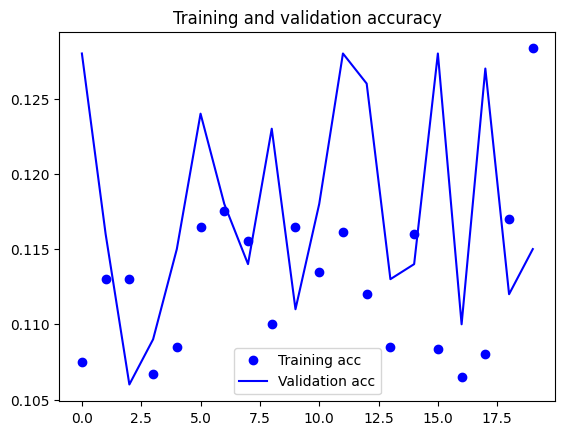

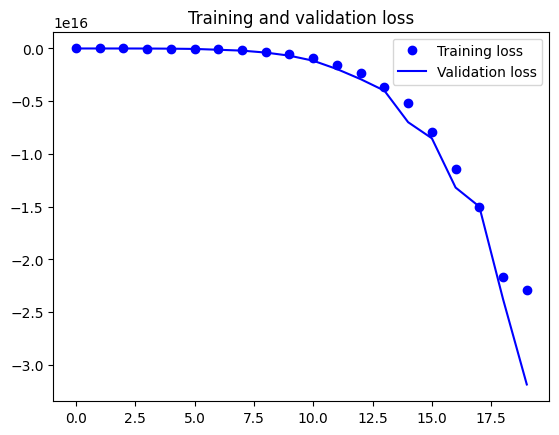

In [7]:
# plot the training and validation scores
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [8]:
# evaludate the model
# Evaluation

eval_test = model.evaluate(test_generator, steps=1000)
print("The test score (accuracy) is {}%".format(eval_test[1]*100))


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - acc: 0.0000e+00 - loss: 61961345695744000.0000
The test score (accuracy) is 0.0%


In [9]:
# initiate a pre-trained convolutional base VGG16
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
conv_base.summary()



Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# build the network
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,910,017 (72.14 MB)

 Trainable params: 4,195,329 (16.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [11]:
# configure the model
from keras import optimizers
model.compile(loss='binary_crossentropy',
#              optimizer=optimizers.RMSprop(lr=2e-5),
              optimizer = 'rmsprop',
              metrics=['acc'])

# train the model
history = model.fit(
      train_generator,
      steps_per_epoch=100,     
      epochs=5,
      validation_data=valid_generator,
      validation_steps=50       # 1000/20
      )


Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - acc: 0.1348 - loss: -292.4383 - val_acc: 0.1250 - val_loss: -1591.9399
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - acc: 0.1237 - loss: -2271.9753 - val_acc: 0.1320 - val_loss: -4349.7563
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - acc: 0.1164 - loss: -5489.8008 - val_acc: 0.1270 - val_loss: -8542.7373
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - acc: 0.1167 - loss: -11193.1621 - val_acc: 0.1220 - val_loss: -14613.2236
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - acc: 0.1192 - loss: -16094.9980 - val_acc: 0.0960 - val_loss: -24722.4668


In [12]:
# evaludate the model
# Evaluation

eval_test = model.evaluate(test_generator, steps=1000)
print("The test score (accuracy) is {}%".format(eval_test[1]*100))

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 83s 83ms/step - acc: 0.0000e+00 - loss: 43286.5234
The test score (accuracy) is 0.0%
